In [105]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns

In [2]:
data_path = './data/'

In [87]:
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')

/home/ran/Dev/dh_yyr/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')
train_users = pd.read_csv(data_path + 'train_users.csv')
train_events = pd.read_csv(data_path + 'train_events.csv')
train_subscriptions = pd.read_csv(data_path + 'train_subscriptions.csv')
test_accounts = pd.read_csv(data_path + 'test_accounts.csv')
test_users = pd.read_csv(data_path + 'test_users.csv')
test_events = pd.read_csv(data_path + 'test_events.csv')
test_subscriptions = pd.read_csv(data_path + 'test_subscriptions.csv')

/home/ran/Dev/dh_yyr/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


accounts = pd.concat([train_accounts, test_accounts], sort=False)
users = pd.concat([train_users, test_users], sort=False)
events = pd.concat([train_events, test_events], sort=False)
subscriptions = pd.concat([train_subscriptions, test_subscriptions], sort=False)
print(f'accounts: {len(accounts)}')
print(f'users {len(users)}')
print(f'events {len(events)}')
print(f'subs {len(subscriptions)}')

In [4]:
train_accounts.describe()[]

,account_id,plan_id,churn_reason,time_diff,paying,has_logo,collection_21_days,company_size,max_team_size,min_team_size,mrr,lead_score
count,1.361978e+06,28603.000000,23931.000000,1.132187e+06,1.361978e+06,1361978.0,1.361978e+06,2.834820e+05,1.214368e+06,1.214368e+06,45603.000000,1.361978e+06
mean,7.169008e+05,441.503758,14.743387,-1.437861e+00,2.100107e-02,1.0,7.736925e+00,1.096807e+04,1.758460e+01,1.091249e+01,38.944083,2.489468e-02
std,4.138253e+05,411.822589,3.268965,4.719247e+00,1.433877e-01,0.0,1.027692e+02,5.941467e+04,6.850333e+01,5.318987e+01,69.307111,1.558042e-01
min,1.000000e+00,9.000000,1.000000,-1.200000e+01,0.000000e+00,1.0,-1.440000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.586152e+05,208.000000,13.000000,-5.000000e+00,0.000000e+00,1.0,0.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,0.000000,0.000000e+00
50%,7.169535e+05,232.000000,15.000000,-3.000000e+00,0.000000e+00,1.0,0.000000e+00,2.100000e+02,5.000000e+00,2.000000e+00,25.000000,0.000000e+00
75%,1.075188e+06,816.000000,18.000000,2.000000e+00,0.000000e+00,1.0,0.000000e+00,2.750000e+03,1.000000e+01,6.000000e+00,48.000000,0.000000e+00
max,1.433659e+06,1678.000000,18.000000,1.400000e+01,1.000000e+00,1.0,2.080800e+04,2.300000e+06,5.000000e+02,5.000000e+02,3468.000000,1.000000e+00


In [33]:
na = train_accounts.isna().sum() / len(train_accounts) * 100
na[na > 0]
#train_accounts.count()

churn_date                 99.788396
churn_reason               98.242923
time_diff                  16.871858
region                      6.497902
country                     1.444664
subscription_started_at    97.637847
os                          0.006241
browser                    14.107129
company_size               79.186007
payment_currency            0.586720
max_team_size              10.837914
min_team_size              10.837914
industry                   36.059099
utm_cluster_id             51.409861
mrr                        96.651708
user_goal                  64.376150
user_description           77.307710
team_size                  29.893875
dtype: float64

In [41]:
train_accounts['country'].value_counts()

US    314456
BR    155601
MX    109291
GB     65998
CO     64330
       ...  
TK         1
CC         1
PM         1
BQ         1
AS         1
Name: country, Length: 236, dtype: int64

In [32]:

train_accounts['plan_id'].fillna(0, inplace=True)

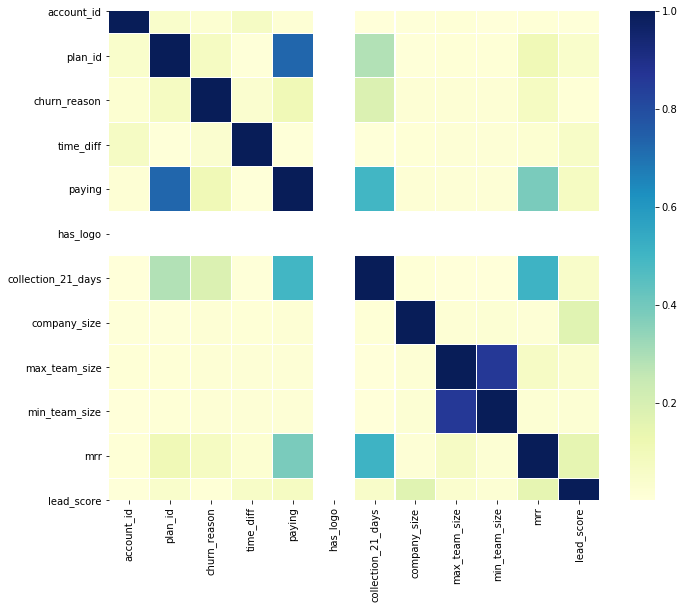

In [34]:
corrmat = train_accounts.select_dtypes('number').corr()
f, ax = plt.subplots(figsize = (11,9))
sns.heatmap(abs(corrmat), ax=ax, cmap='YlGnBu', linewidths= 0.1)

account_id+ acount_name - remove, just id
plan_id - remove, correlates with 'paying' and too many categories
subscription_started_at - invesitgate with 'paying'
paying - keep for later
collection_21_days - keep fpr later
mrr - keep for later
has_logo - remove, one value feature
created_at - keep for later
trial_start - keep for later
churn_* - investigate
country, time_diff, region - maybe keep country, can fill time diff using country, maybe convert country to continent or to x,y and group
device - keep, maybe remove tablet
os - keep, remove blackberry
browser - fill by existing dist
payment_curency - to keep and investigate, maybe non common currency tend to pay more
company_size - keep, maybe corr with lead. 80 nan, part of survy
min/max_team_size - keep, maybe create one feature range
industry - keep investigate
utm_cluster_id - same as industry
user_goal - part of survy
user_description - part of survy
team_size - part of survy

In [63]:
train_accounts.head()

,account_id,account_name,created_at,plan_id,trial_start,churn_date,churn_reason,time_diff,region,country,subscription_started_at,paying,has_logo,device,os,browser,collection_21_days,company_size,payment_currency,max_team_size,min_team_size,industry,utm_cluster_id,mrr,user_goal,user_description,team_size,lead_score
0,1.0,"Gardner, Barron and Keller",2019-01-01 00:01:15,0.0,2019-01-01 00:01:15,NaN,NaN,11.0,New South Wales,AU,NaN,0,1,desktop,windows,microsoft edge,0,NaN,AUD,5.0,2.0,NaN,orders,NaN,NaN,NaN,NaN,0
1,2.0,Dunn Ltd,2019-01-01 00:01:52,0.0,2019-01-01 00:01:52,NaN,NaN,NaN,New Jersey,US,NaN,0,1,mobile,ios,NaN,0,NaN,USD,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3.0,Boone Inc,2019-01-01 00:03:12,0.0,2019-01-01 00:03:12,NaN,NaN,-6.0,Louisiana,US,NaN,0,1,desktop,windows,chrome,0,NaN,USD,1.0,1.0,Other,todos,NaN,NaN,NaN,1,0
3,4.0,"Christian, Carroll and Davis",2019-01-01 00:04:11,0.0,2019-01-01 00:04:11,NaN,NaN,NaN,Tel Aviv,IL,NaN,0,1,mobile,android,NaN,0,NaN,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5.0,Brooks-Oliver,2019-01-01 00:04:21,0.0,2019-04-04 11:09:12,NaN,NaN,-5.0,North Carolina,US,NaN,0,1,desktop,chrome_os,chrome,0,NaN,USD,1.0,1.0,Design,todos,NaN,NaN,NaN,1,0


In [86]:
train_accounts.team_size

0           NaN
1           NaN
2             1
3           NaN
4             1
           ... 
1361973     1-1
1361974     2-5
1361975     NaN
1361976     1-1
1361977    6-10
Name: team_size, Length: 1361978, dtype: object

In [84]:

train_accounts.utm_cluster_id.value_counts()

todos                   198206
internal_projects       150673
client_projects         105920
crm                      41321
marketing                36953
time_management          27133
Other                    25542
orders                   18628
tech                     18477
other                    10259
product_roadmap           7504
project_management        7291
hr                        7026
event_planning            2159
tasks_management          1646
construction               711
marketing_startup          588
generic                    515
supply_chain               306
time_tracking              249
calendar_planning          233
virality_form              145
communication              144
creative                   137
virality_broadcast          16
design_and_creative          4
design_and_creative          1
Name: utm_cluster_id, dtype: int64

In [91]:
train_accounts.team_size.value_counts()

2-5               352333
1-1               302656
6-10              145526
11-15              53344
16-25              39221
26-50              26579
51-100             13439
500                10519
101-500             7705
1                   2501
Solo yo              663
Moi uniquement       159
Apenas eu            112
Nur ich               40
0                     21
2                      7
8                      3
3                      2
Name: team_size, dtype: int64

In [71]:
train_accounts['team_size'] = (train_accounts.min_team_size.astype(str) + '-' + train_accounts.max_team_size.astype(str))

In [74]:
a = train_accounts.team_size.value_counts()
a

2.0-5.0        437155
1.0-1.0        367151
6.0-10.0       178895
nan-nan        147610
11.0-15.0       65680
16.0-25.0       48538
0.0-0.0         44259
26.0-50.0       33056
51.0-100.0      16567
500.0-500.0     13558
101.0-500.0      9448
1.0-15.0           44
2.0-2.0             7
8.0-8.0             3
15.0-50.0           3
50.0-150.0          2
3.0-3.0             2
Name: team_size, dtype: int64

In [75]:
b = train_accounts[train_accounts.lead_score==1].team_size.value_counts()
b

2.0-5.0        10012
6.0-10.0        7156
1.0-1.0         3597
11.0-15.0       3537
16.0-25.0       2670
nan-nan         2123
26.0-50.0       1965
51.0-100.0      1058
101.0-500.0      737
0.0-0.0          534
500.0-500.0      516
1.0-15.0           1
Name: team_size, dtype: int64

In [76]:
b / a

0.0-0.0        0.012065
1.0-1.0        0.009797
1.0-15.0       0.022727
101.0-500.0    0.078006
11.0-15.0      0.053852
15.0-50.0           NaN
16.0-25.0      0.055008
2.0-2.0             NaN
2.0-5.0        0.022903
26.0-50.0      0.059445
3.0-3.0             NaN
50.0-150.0          NaN
500.0-500.0    0.038059
51.0-100.0     0.063862
6.0-10.0       0.040001
8.0-8.0             NaN
nan-nan        0.014382
Name: team_size, dtype: float64

In [78]:
7156 / 178895

0.04000111797423069

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [112]:
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')
train_accounts = train_accounts[['account_id','max_team_size','lead_score']].set_index('account_id')
train_accounts.dropna(inplace=True)
accounts_sample = train_accounts.sample(frac=0.1)
y = accounts_sample.pop('lead_score')
x = accounts_sample

/home/ran/Dev/dh_yyr/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/home/ran/Dev/dh_yyr/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
y_pred[1] = 1
print(classification_report(y_test, y_pred, target_names=['not lead','lead']))
print('Acc:  {}'.format(metrics.accuracy_score(y_test, y_pred)))
print('MCC: {}'.format(metrics.matthews_corrcoef(y_test, y_pred)))
print('F1:  {}'.format(metrics.f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

    not lead       0.97      1.00      0.99      5917
        lead       0.00      0.00      0.00       155

    accuracy                           0.97      6072
   macro avg       0.49      0.50      0.49      6072
weighted avg       0.95      0.97      0.96      6072

Acc:  0.974308300395257
MCC: -0.0020772317306151627
F1:  0.0
